In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import sympy as sm

# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [7]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [8]:
h_vec = np.linspace(0.1,1.5,100) 

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

We start by defining the basic functions of the model, i.e. consumption, utility, disutility and the value of life (the worker's problem)

In [9]:
def c(h,l):
    if l==1:
        return w*h*l # Consumption when working
    elif l==0:
        return b # Consumption when not working

# Utility function
def utility(h,l):
    return (c(h,l)**(1-rho))/(1-rho)

# Disutility when working
def disutility(l):
    return gamma*l

# Consumer's value of life in period 2 dependent on human capital and working status
def v2(h2,l2):
    return utility(h2,l2)-disutility(l2)

# Consumer's value of life in period 1 dependent on human capital and working status
def v1(h1,l1,v2_interp):
    
    # v2 when human capital have low value to the consumer
    h2_low = h1 + l1
    v2_low = v2_interp([h2_low])[0]
    
    # v2 when human capital have high value to the consumer
    h2_high = h1 + l1 + Delta
    v2_high = v2_interp([h2_high])[0]
    
    # Expected value of life
    exp_v2 = 0.5*v2_low + 0.5*v2_high
    
    # Value of life in period 1
    return utility(h1,l1) - disutility(l1) + beta*exp_v2

Next we depict the value of life in period 2 dependent on human capital the consumer's working status, by plotting the predetermined vector of human capital, h_vec, into the function of the consumer's value of life, v2.

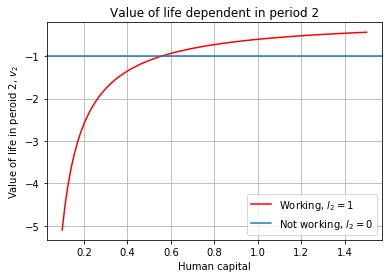

In [14]:
# Plotting value of life in period 2 dependent on human capital.
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec,v2(h_vec,1),color="red") # Value of life when working, l2=1
ax.axhline(y=v2(h_vec,0), xmin=0, xmax =1, clip_on = False) # Value of life when not working, l2=0

# Setting grid, labels, etc.
ax.grid()
ax.set_xlabel('Human capital')
ax.set_ylabel('Value of life in peroid 2, $v_2$')
ax.set_title('Value of life dependent in period 2')
plt.legend(('Working, $l_2=1$','Not working, $l_2=0$'),loc='lower right');

Then we solve the model in period 2, and plot labor supply as a function of human capital.

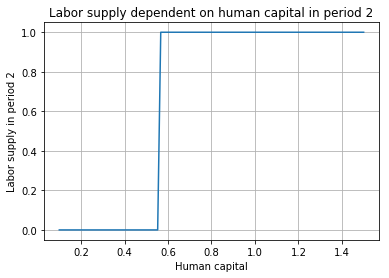

In [13]:
def sol2(h_vec):
    # Creating grids
    v2_vec =  np.empty(100)
    l2_vec = np.empty(100)

    # Solution for h2
    for i, h in enumerate(h_vec):
    
        # Comparing the value of life when working or not, such that the consumer chooses whatever has the higher utility
        if (v2(h,1) > v2(h,0)) == True: # If the consumer gets higher utility from working, then work (l2=1)
            l2_vec[i] = 1
        else: # if the consumer does not get higher utility from working, then do not work (l2=0)
            l2_vec[i] = 0
    
        v2_vec[i] = v2(h,l2_vec[i])
    
    return v2_vec, l2_vec

# Unpacking the solution
v2_vec,l2_vec =  sol2(h_vec)

# Then we plot the solution
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec,l2_vec)
ax.grid()
ax.set_xlabel('Human capital')
ax.set_ylabel('Labor supply in period 2')
ax.set_title('Labor supply dependent on human capital in period 2');

We find the level of human capital required for the consumer to work by sympy (whoch is also indicated by the intercept of working/not working in the first figre and by the change labor supply in the second figure.

In [12]:
h2=sm.symbols('h_2')
intercept = sm.Eq(1**(1-2)/(1-2),(h2*2*1)**(1-2)/(1-2)-0.1*1)
solution_h2 = sm.solve(intercept,h2)
print(f' When human capital is above ',solution_h2,f' the consumer chooses to work')

 When human capital is above  [0.555555555555556]  the consumer chooses to work


**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

As we have already defined the basic functions, we start by finding the solution to the consumer's problem, i.e. at what leve of human capital she prefers to work, such that she obtains the optimal value of life is.

In [15]:
# Constructing the interpolator
v2_interp = interpolate.RegularGridInterpolator((h_vec,),v2_vec,bounds_error=False,fill_value=None)

# Finding solution
def sol1(h_vec, v2_interp):
    
    # Creating grids
    v1_vec =  np.empty(100)
    l1_vec = np.empty(100)
    
    # Next we solve for each h1 in grid
    for i,h1 in enumerate(h_vec):
        if (v1(h1,1,v2_interp) > v1(h1,0,v2_interp)) == True: # If the consumer gets higher utility from working, then work (l2=1)
            l1_vec[i] = 1
        else: # if the consumer does not get higher utility from working, then do not work (l2=0)
            l1_vec[i] = 0
    
        v1_vec[i] = v1(h1,l1_vec[i],v2_interp)
    
    return v1_vec, l1_vec

In [16]:
# Unpacking the solution
v1_vec, l1_vec =  sol1(h_vec, v2_interp)

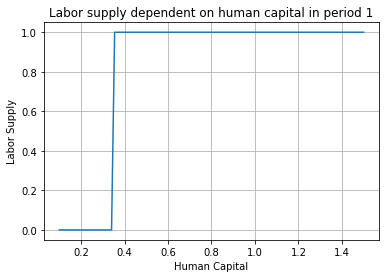

In [17]:
# Then we plot the solution
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec,l1_vec)
ax.grid()
ax.set_xlabel('Human Capital')
ax.set_ylabel('Labor Supply')
ax.set_title('Labor supply dependent on human capital in period 1');

This level is also found by the use of sympy

In [18]:
h2=sm.symbols('h_2')
intercept = sm.Eq(1**(1-2)/(1-2),(h2*2*1)**(1-2)/(1-2)-0.1*1)
solution_h2 = sm.solve(intercept,h2)
print(f' When human capital is above ',solution_h2,f' the consumer chooses to work')

 When human capital is above  [0.555555555555556]  the consumer chooses to work


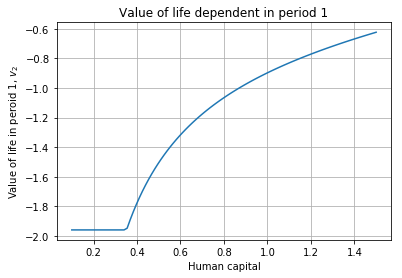

In [19]:
# Plotting value of life in period 1 dependent on human capital.
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec,v1_vec) # Plotting optimal value of life
ax.grid()
ax.set_xlabel('Human capital')
ax.set_ylabel('Value of life in peroid 1, $v_2$')
ax.set_title('Value of life dependent in period 1');

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

From the result of Q1 and Q2, we note that a high level of human capital is required for the consumer to work in period 2 than in period 2. Thus, if she never works when potential wage income is lower than the unemployment benefits she can get in period 1, nor would she ever work under the same conditions in period 2. Herefor we consider only period 1.

We consider a case when her pay is marginal lower than her benefit, i.e. $w_l=0.99$ and benefit is he same as before $b=1$.

In [21]:
w_l = 0.99

# Redefining the consumption constraint
def c_l(h,l):
    if l==1:
        return w_l*h*l # Consumption when working
    elif l==0:
        return b # Consumption when not working

# Utility function
def utility_l(h,l):
    return (c_l(h,l)**(1-rho))/(1-rho)

# Disutility when working
def disutility(l):
    return gamma*l

# Consumer's value of life in period 2 dependent on human capital and working status
def v2(h2,l2):
    return utility_l(h2,l2)-disutility(l2)
                                                                                 
                                                                                 
def v1_l(h1,l1,v2_interp):
    
    # v2 when human capital has low value to the consumer
    h2_low = h1 + l1
    v2_low = v2_interp([h2_low])[0]
    
    # v2 when human capital has high value to the consumer
    h2_high = h1 + l1 + Delta
    v2_high = v2_interp([h2_high])[0]
    
    # Expected value of life
    exp_v2 = 0.5*v2_low + 0.5*v2_high
    
    # Value of life in period 1
    return utility_l(h1,l1) - disutility(l1) + beta*exp_v2                                                                                 
                                                                                 
def sol1_l(h_vec, v2_interp):
    
    # Creating grids
    v1_vec =  np.empty(100)
    l1l_vec = np.empty(100)
    
    # Next we solve for each h1 in grid
    for i,h1 in enumerate(h_vec):
        if (v1_l(h1,1,v2_interp) > v1_l(h1,0,v2_interp)) == True: # If the consumer gets higher utility from working, then work (l2=1)
            l1l_vec[i] = 1
        else: # if the consumer does not get higher utility from working, then do not work (l2=0)
            l1l_vec[i] = 0
    
        v1_vec[i] = v1(h1,l1l_vec[i],v2_interp)
    
    return v1_vec, l1l_vec

v1_vec, l1l_vec = sol1_l(h_vec, v2_interp)

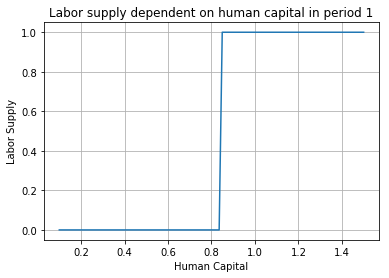

In [22]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(h_vec,l1l_vec)
ax.grid()
ax.set_xlabel('Human Capital')
ax.set_ylabel('Labor Supply')
ax.set_title('Labor supply dependent on human capital in period 1');

Thus when human capital is above 0.8, the consumer wants to work in period 1, even though her wage is lower than the benefits, $(w=0.99<b=1)$

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [23]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

In [31]:
# Importing the sympy module
import sympy as sm
sm.init_printing(use_unicode=True)

In [32]:
# Defining the variables and the parameters of the model in terms of sympy
y = sm.symbols('y_t')
pi = sm.symbols('pi_t')
y1 = sm.symbols('y_t-1')
pi1 = sm.symbols('pi_t-1')
v = sm.symbols('v_t')
s = sm.symbols('s_t')
s1 = sm.symbols('s_t-1')
gamma = sm.symbols('gamma')
alpha = sm.symbols('alpha')
h = sm.symbols('h')
b = sm.symbols('b')
phi = sm.symbols('phi')

# Defining the AD and SRAS equations in terms of the sympy variables
SRAS = pi1 + gamma*y-phi*gamma*y1+s-phi*s1
AD = 1/(h*alpha)*(v-(1+b*alpha)*y)

In [33]:
# We set SRAS equal to AS 
SRAS_AD = sm.Eq(SRAS, AD)

In [34]:
y_st = sm.solve(SRAS_AD, y)

The optimal value for y in equilibrium is:


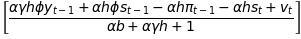

In [35]:
print(f'The optimal value for y in equilibrium is:')
y_st

We can now find the value for $\pi_t$ given the value for $y_t$

In [36]:
pi_st = 1/(h*alpha)*(v-(1+b*alpha)*y_st[0])  # we add [0] as y_t is a list with one element at index 0

The optimal value for pi in equilibrium is:


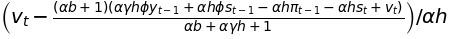

In [37]:
print(f'The optimal value for pi in equilibrium is:')
pi_st

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

Firstly we turn our sympy functions into numerically functions such that we can solve for $y_t$ and $\pi_t$

In [38]:
y_num = sm.lambdify((v,alpha,b,gamma,h,phi,y1,pi1,s,s1),y_st[0])
pi_num = sm.lambdify((v,alpha,b,gamma,h,phi,y1,pi1,s,s1), pi_st)

Next, we define output and inflation as functions, $y_t$ and $\pi_t$

In [39]:
def y_func(v,y1,pi1,s,s1):
    return y_num(v,par['alpha'],par['b'],par['gamma'],par['h'],par['phi'],y1,pi1,s,s1)

def pi_func(v,y1,pi1,s,s1):
    return pi_num(v,par['alpha'],par['b'],par['gamma'],par['h'],par['phi'],y1,pi1,s,s1)

For $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$ we get that $y_t$ and $\pi_t$ in equilibrium are: 

In [40]:
print(f'y in equilibrium:',y_func(v=0,y1=0,pi1=0,s=0,s1=0))
print(f'pi in equilibrium:',pi_func(v=0,y1=0,pi1=0,s=0,s1=0))

y in equilibrium: 0.0
pi in equilibrium: 0.0


For the demand shock $v_t=0.1$ we get that $y_t$ and $\pi_t$ are:

In [41]:
print(f'y when v_t=0.1:',y_func(v=0.1,y1=0,pi1=0,s=0,s1=0))
print(f'pi when v_t=0.1:',pi_func(v=0.1,y1=0,pi1=0,s=0,s1=0))

y when v_t=0.1: 0.0244140625
pi when v_t=0.1: 0.001831054687500002


To illustrate this graphically we define our AD and SRAS curves numerically 

In [42]:
def SRAS_fun(pi1,s,s1,y): 
    return pi1 + par['gamma']*y-par['phi']*par['gamma']*y1+s-par['phi']*s1

def AD_fun(v,y):
    return 1/(par['h']*par['alpha'])*(v-(1+par['b']*par['alpha'])*y)

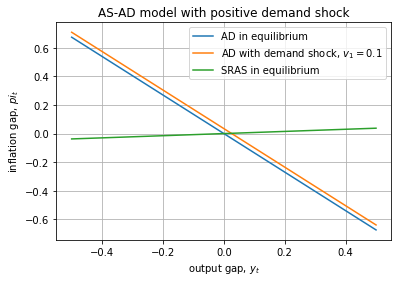

In [43]:
# Plotting the AD and SRAS curve before and after the shock
pi1 = 0 
s = 0 
s1 = 0 
v = 0 
v_shock = 0.1
y = np.linspace(-0.5,0.5,100)

AD_new = AD_fun(v,y)
AD_shock = AD_fun(v_shock,y)
SRAS_new = SRAS_fun(pi1,s,s1,y)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(y, AD_new, label='AD in equilibrium')
ax.plot(y, AD_shock, label='AD with demand shock, $v_1=0.1$')
ax.plot(y, SRAS_new, label='SRAS in equilibrium')
ax.set_xlabel('output gap, $y_t$')
ax.set_ylabel('inflation gap, $pi_t$')
ax.set_title ('AS-AD model with positive demand shock')
ax.grid()
ax.legend();

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [48]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

In [49]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

To examine the evolution of the economy after a persistent shock, $x_0=0.1$, we consider output gap and inflation gap within 100 periods.

In [50]:
# Defining the autoregressive shocks
def v_ar(v1,x):
    return par['delta']*v1+x

def s_ar(s1,c):
    return par['omega']*s1+c

# Setting initial values
T = 100
pi_vec = [0]
y_vec = [0]
s_vec = [0]
v_vec = [0]
c_vec = np.zeros(T)
x_vec = np.zeros(T)
x_vec[1] = 0.1

# Simulation
for t in range(1,T):
    s_vec.append(s_ar(s_vec[t-1],c_vec[t])) # appending the ar-process to the s-vector
    v_vec.append(v_ar(v_vec[t-1],x_vec[t])) # appending the ar-process to the v-vector

    y_vec.append(y_func(v_vec[t],y_vec[t-1],pi_vec[t-1],s_vec[t],s_vec[t-1])) # appending all vectors to output 
    pi_vec.append(pi_func(v_vec[t],y_vec[t-1],pi_vec[t-1],s_vec[t],s_vec[t-1])) # appending all vectors to inflation

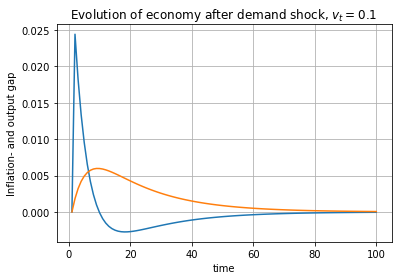

In [51]:
# Creating an empty time-vector, to be able to plot the figure:
time = np.linspace(1,T,T)

# Plotting the result
fig = plt.figure()
plt.axes()
ax = fig.add_subplot(1,1,1)
ax.plot(time, y_vec)
ax.plot(time, pi_vec)
ax.set_xlabel('time')
ax.set_ylabel('Inflation- and output gap')
ax.set_title('Evolution of economy after demand shock, $v_t=0.1$')
ax.grid()

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

In [53]:
np.random.seed(2608)
# Redefining time
T_stoc = 1000
pi_stoc_vec = [0]
y_stoc_vec = [0]
s_stoc_vec = [0]
v_stoc_vec = [0]
c_stoc_vec = np.random.normal(loc=0.0,scale=par['sigma_c'],size=1000)
x_stoc_vec = np.random.normal(loc=0.0,scale=par['sigma_x'],size=1000)


for t in range(1,T_stoc):
    s_stoc_vec.append(s_ar(s_stoc_vec[t-1],c_stoc_vec[t])) # appending the ar-process to the s-vector
    v_stoc_vec.append(v_ar(v_stoc_vec[t-1],x_stoc_vec[t])) # appending the ar-process to the v-vector

    y_stoc_vec.append(y_func(v_stoc_vec[t],y_stoc_vec[t-1],pi_stoc_vec[t-1],s_stoc_vec[t],s_stoc_vec[t-1])) # appending all vectors to output 
    pi_stoc_vec.append(pi_func(v_stoc_vec[t],y_stoc_vec[t-1],pi_stoc_vec[t-1],s_stoc_vec[t],s_stoc_vec[t-1])) # appending all vectors to inflation

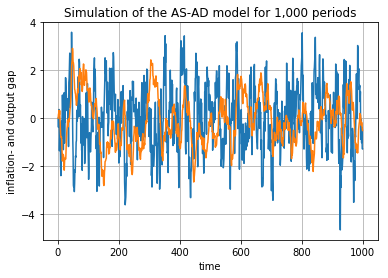

In [54]:
# Creating an empty time-vector, to be able to plot the figure:
time2 = np.linspace(1,T_stoc,T_stoc)

# Plotting the result
fig = plt.figure()
plt.axes()
ax = fig.add_subplot(1,1,1)
ax.plot(time2, y_stoc_vec)
ax.plot(time2, pi_stoc_vec)
ax.set_xlabel('time')
ax.set_ylabel('inflation- and output gap')
ax.set_title('Simulation of the AS-AD model for 1,000 periods')
ax.grid()

In [55]:
# Calculationg statistics using numpy
var_y = np.var(y_stoc_vec)
var_pi = np.var(pi_stoc_vec)
ac_pi = np.corrcoef(pi_stoc_vec[1:T_stoc],pi_stoc_vec[0:-1])
ac_y = np.corrcoef(y_stoc_vec[1:],y_stoc_vec[:-1])
corr_ypi = np.corrcoef(y_stoc_vec,pi_stoc_vec)

# Printing the result
print(f'var(y_t) = {var_y:.3f}')
print(f'var(pi_t) = {var_pi:.3f}')
# For the correlation function, numpy return a matrix of correlations of  y_t with y_t, y_t with y_t-1 etc. Hence we refer to the first number in the first line to find the correlation between the numbers 
print(f'ac(y_t) = {ac_y[0,1]:.3f}')
print(f'ac(pi_t) = {ac_pi[0,1]:.3f}')
print(f'corr(y_t,pi_t) = {corr_ypi[0,1]:.3f}')

var(y_t) = 1.833
var(pi_t) = 1.036
ac(y_t) = 0.757
ac(pi_t) = 0.975
corr(y_t,pi_t) = -0.156


**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

In [56]:
# Redefining functions for output and inflaiton gap in terms of phi as a variable and not a parameter
def y_func_corr(phi,v,y1,pi1,s,s1):
    return y_num(v,par['alpha'],par['b'],par['gamma'],par['h'],phi,y1,pi1,s,s1)

def pi_func_corr(phi,v,y1,pi1,s,s1):
    return pi_num(v,par['alpha'],par['b'],par['gamma'],par['h'],phi,y1,pi1,s,s1)

# Defining af function for correlation between output and inflation
def correlation(phi):
    
    # Redefining initial values, time and seed
    pi_corr = [0]
    y_corr = [0]
    s_corr = [0]
    v_corr = [0]
    T_corr = 1000 
    np.random.seed(2608)
   
    for t in range(1,T_corr):
        s_corr.append(s_ar(s_corr[t-1],c_vec[t]))
        v_corr.append(v_ar(v_corr[t-1],x_vec[t]))
        
        pi_corr.append(pi_func_corr(phi,v_corr[t],y_corr[t-1],pi_corr[t-1],s_corr[t],s_corr[t-1]))
        y_corr.append(y_func_corr(phi,v_corr[t],y_corr[t-1],pi_corr[t-1],s_corr[t],s_corr[t-1]))
        
        correlation = np.corrcoef(y_corr,pi_corr)[1,0]
        
        return correlation

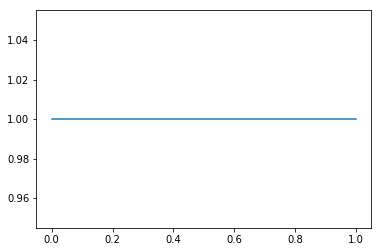

In [57]:
corr_ypi = []
phi_vec = np.linspace(1e-8,1,T_stoc)

for i in phi_vec:
    corr_ypi.append(correlation(phi=i))


plt.plot(phi_vec,corr_ypi)

In [58]:
# First we plot how the correlation between inflation and output gap depend on phi.

# Redefining functions for output and inflaiton gap in terms of phi as a variable
def y_phi_func(phi,v,y1,pi1,s,s1):
    return y_num(v,par['alpha'],par['b'],par['gamma'],par['h'],phi,y1,pi1,s,s1)

def pi_phi_func(phi,v,y1,pi1,s,s1):
    return pi_num(v,par['alpha'],par['b'],par['gamma'],par['h'],phi,y1,pi1,s,s1)

# Defining initial values for the vectors needed in the simulation
def corr_1(phi):
    
    # Redefining initial values
    T_phi = 1000
    v_phi_vec = [0]
    s_phi_vec = [0]
    c_phi_vec = np.random.normal(loc=0.0,scale=par['sigma_c'],size=1000)
    x_phi_vec = np.random.normal(loc=0.0,scale=par['sigma_x'],size=1000)
    pi_phi_vec = [0]
    y_phi_vec = [0]
    corr_vec = [0]
    
    for t in range(1,T_stoc):
        s_phi_vec.append(s_ar(s_phi_vec[t-1],c_phi_vec[t])) # appending the ar-process to the s-vector
        v_phi_vec.append(v_ar(v_phi_vec[t-1],x_phi_vec[t])) # appending the ar-process to the v-vector

        y_phi_vec.append(y_phi_func(phi,v_phi_vec[t],y_phi_vec[t-1],pi_phi_vec[t-1],s_phi_vec[t],s_phi_vec[t-1])) # appending all vectors to output 
        pi_phi_vec.append(pi_phi_func(phi,v_phi_vec[t],y_phi_vec[t-1],pi_phi_vec[t-1],s_phi_vec[t],s_phi_vec[t-1])) # appending all vectors to inflation
    
    corr_phi = np.corrcoef(y_phi_vec,pi_phi_vec)
    
    result=corr_phi[0,1]
    
    return result

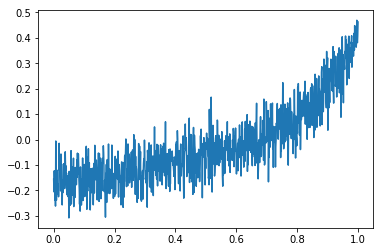

In [59]:
corr_test1 =[]
phi_vec1 = np.linspace(1e-8,1,1000)

for i in phi_vec1:
    corr_test1.append(corr_1(phi=i))

plt.plot(phi_vec1,corr_test1)

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [7]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?